# Step by step guide to calibrate and program IMU9250 using arduino micro

###                                                         -- Bitto Joseph 19.11.2020

## Schematics I2C for Arduino micro

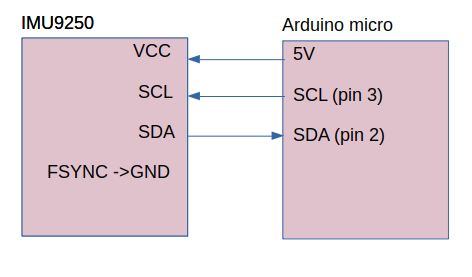

# 1. Calibrating Accelerometer

## Required tools:
* Arduino micro
* Sensor MPU-9250/6500
* Right angled holder to keep the sensor in the correct orientation
* Something to stick sensor to the holder during calbration 
* Arduino ide to flash codes to arduino 
* Cables

### Flash the following code to Arduino to ensure that the sensor is connected properly 
### Make sure that the Wire.h library is present

```
#include <Wire.h> //include Wire.h library 

void setup()
{
  Wire.begin(); // Wire communication begin
  Serial.begin(9600); // The baudrate of Serial monitor is set in 9600
  while (!Serial); // Waiting for Serial Monitor
  Serial.println("\nI2C Scanner");
}
 
void loop()
{

  byte error, address; //variable for error and I2C address
  
  int nDevices;
 
  Serial.println("Scanning...");
 
  nDevices = 0;
  for (address = 1; address < 127; address++ )
  {

    // The i2c_scanner uses the return value of
    // the Write.endTransmisstion to see if
    // a device did acknowledge to the address.
    Wire.beginTransmission(address);
    error = Wire.endTransmission(); 

    if (error == 0)
    {
      Serial.print("I2C device found at address 0x");
      if (address < 16)
        Serial.print("0");
      Serial.print(address, HEX);
      Serial.println("  !");
      nDevices++;
    }
    else if (error == 4)
    {
      Serial.print("Unknown error at address 0x");
      if (address < 16)
        Serial.print("0");
      Serial.println(address, HEX);
    }
  }
  if (nDevices == 0)
    Serial.println("No I2C devices found\n");
  else
    Serial.println("done\n");
  delay(5000); // wait 5 seconds for the next I2C scan
}
```

### You should receive the following output in the serial monitor
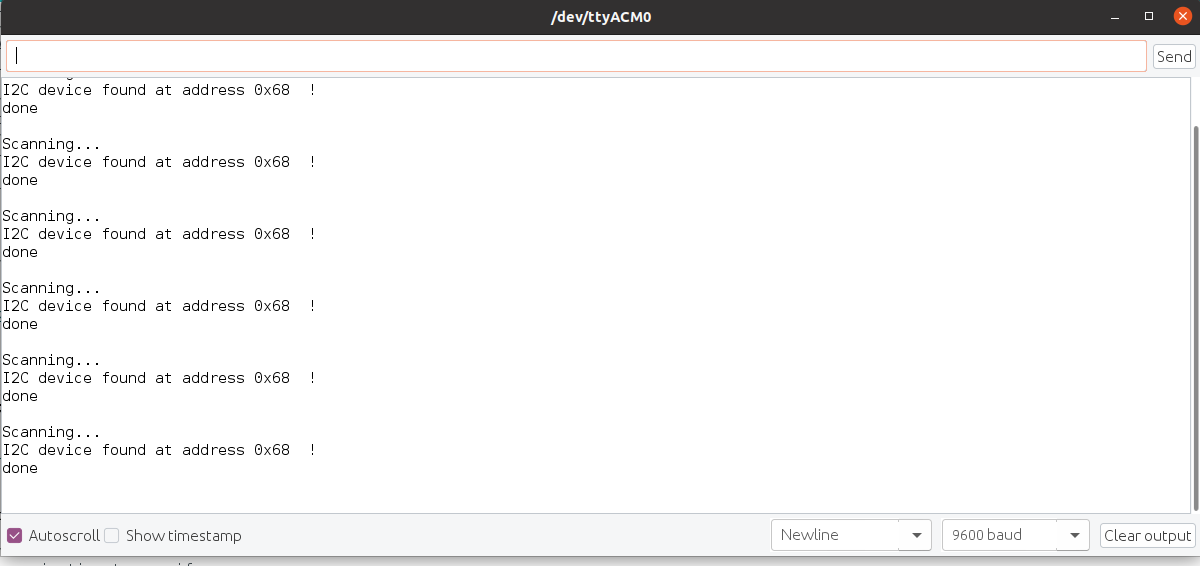

## 1.1 x-axis in positive direction
### Position the holder in such a way that the x-axis in MPU is shown downwards.
### Check the picture below:
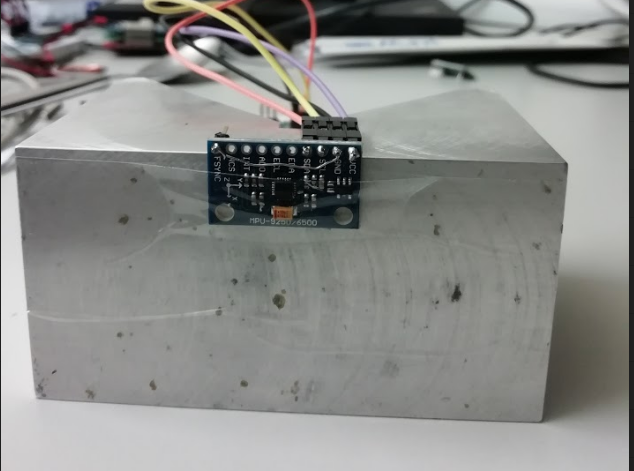

### Flash the following code to Arduino uC

### Install the library MPU9250.h

```
#include "MPU9250.h"

MPU9250 mpu;
float xAxis, yAxis, zAxis;
void setup() {
    Serial.begin(115200);
    Wire.begin();
    delay(2000);

    mpu.setup(0x68);  // change to your own address
}

void loop() {
  if (mpu.update()) {
      xAxis = mpu.getAccX();
      yAxis = mpu.getAccY();
      zAxis = mpu.getAccZ();
      Serial.println(String(xAxis, 4)+" "+String(yAxis, 4)+"  "+ String(zAxis, 4));
  }
}
```

### If everything is working properly you should get the following output at the serial Monitor
# Make sure 
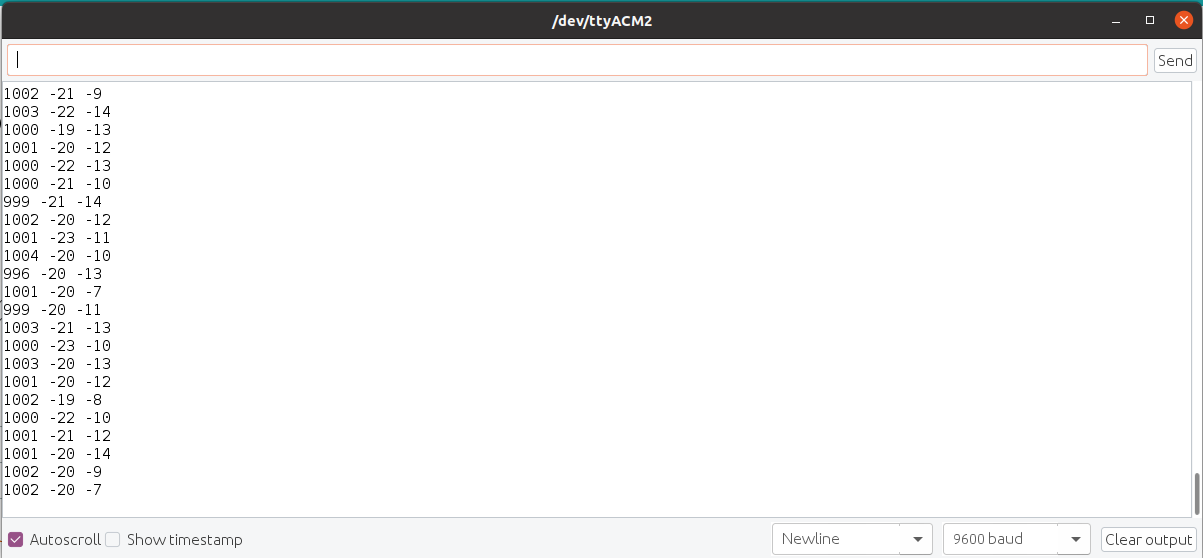

### Save the data to a csv file. 
Make sure that the arduino serial window is closed. If the window is open you will get the following error:
"SerialException: [Errno 16] could not open port /dev/ttyACM0: [Errno 16] Device or resource busy: '/dev/ttyACM0'". It may happen that the port is different you will have to adjust the port accordingly.

In [13]:
import serial
import csv
ser = serial.Serial('/dev/ttyACM0', 9600)

# Always write a new one
with open('./cal_file_positive_x.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            #calibration_list[0] = float(calibration_list[0]) * -1000
            #calibration_list[1] = float(calibration_list[1]) * -1000
            #calibration_list[2] = float(calibration_list[2]) * -1000
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

### Read from the csv and print using pandas

In [14]:
import pandas as pd
cal_positive_x = pd.read_csv("./cal_file_positive_x.csv")

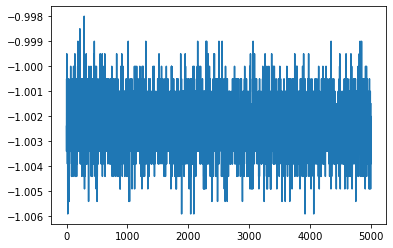

In [15]:
# Retrieve x, y and z 
from matplotlib import pyplot as plt
plt.plot(cal_positive_x.acceleration_in_x)

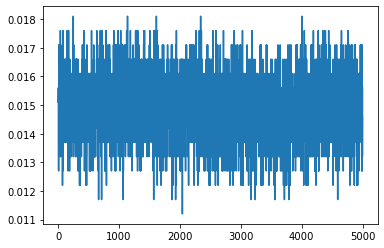

In [16]:
plt.plot(cal_positive_x.acceleration_in_y)

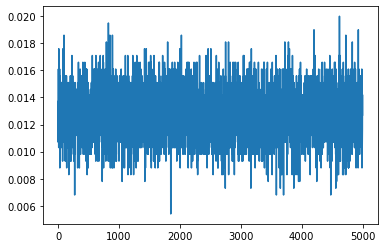

In [17]:
plt.plot(cal_positive_x.acceleration_in_z)

## 1.1 x-axis in negative direction
### Position the holder in such a way that the x-axis in MPU is shown upwards.
### Check the picture below:
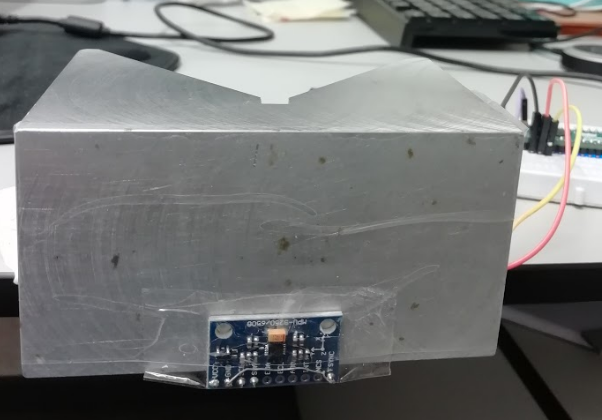

### Save the data to a csv file. 
Make sure that the arduino serial window is closed. If the window is open you will get the following error:
"SerialException: [Errno 16] could not open port /dev/ttyACM0: [Errno 16] Device or resource busy: '/dev/ttyACM0'". It may happen that the port is different you will have to adjust the port accordingly.

In [22]:
# Always write a new one
with open('./cal_file_minus_x.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

In [23]:
import pandas as pd
cal_minus_x = pd.read_csv("./cal_file_minus_x.csv")

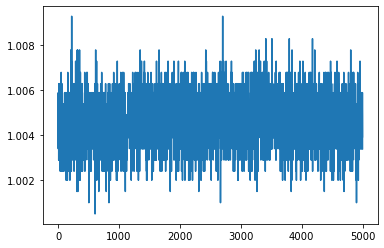

In [24]:
# Retrieve x, y and z 
from matplotlib import pyplot as plt
plt.plot(cal_minus_x.acceleration_in_x)

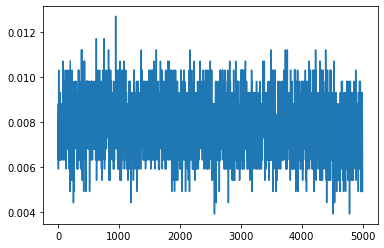

In [25]:
plt.plot(cal_minus_x.acceleration_in_y)

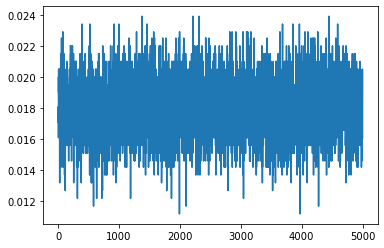

In [26]:
plt.plot(cal_minus_x.acceleration_in_z)

In [75]:
## 1.2 y-axis in positive direction
### Position the holder in such a way that the x-axis in MPU is shown downwards.
### Check the picture below:

In [83]:
# Always write a new one
with open('./cal_file_plus_y.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

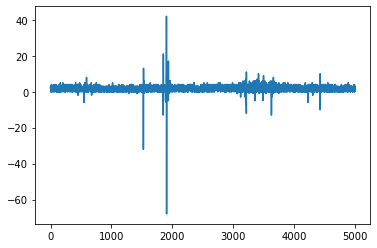

In [84]:
cal_plus_y = pd.read_csv("./cal_file_plus_y.csv")
plt.plot(cal_plus_y.acceleration_in_x)

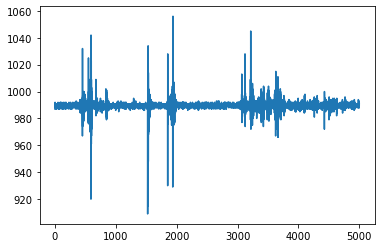

In [85]:
plt.plot(cal_plus_y.acceleration_in_y)

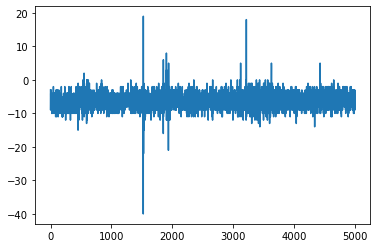

In [86]:
plt.plot(cal_plus_y.acceleration_in_z)

## 1.2 y-axis in negative direction
### Position the holder in such a way that the x-axis in MPU is shown downwards.
### Check the picture below:

In [91]:
# Always write a new one
with open('./cal_file_minus_y.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

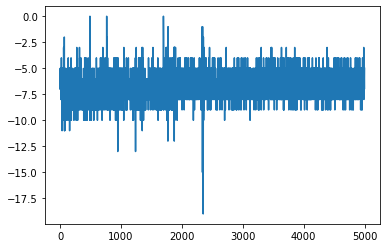

In [92]:
cal_minus_y = pd.read_csv("./cal_file_minus_y.csv")
plt.plot(cal_minus_y.acceleration_in_x)

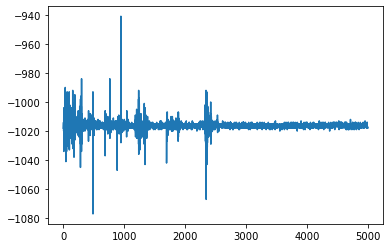

In [93]:
plt.plot(cal_minus_y.acceleration_in_y)

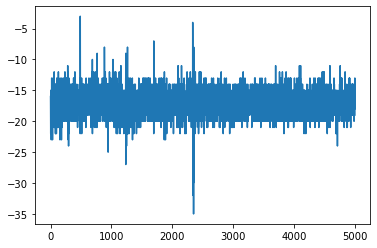

In [94]:
plt.plot(cal_minus_y.acceleration_in_z)

## 1.3 z-axis in positive direction
### Position the holder in such a way that the x-axis in MPU is shown downwards.
### Check the picture below:

In [99]:
# Always write a new one
with open('./cal_file_plus_z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

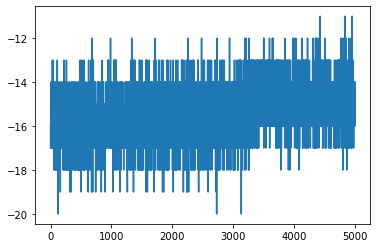

In [100]:
cal_plus_z = pd.read_csv("./cal_file_plus_z.csv")
plt.plot(cal_plus_z.acceleration_in_x)

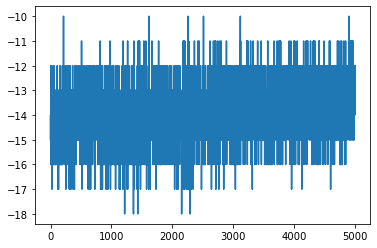

In [101]:
plt.plot(cal_plus_z.acceleration_in_y)

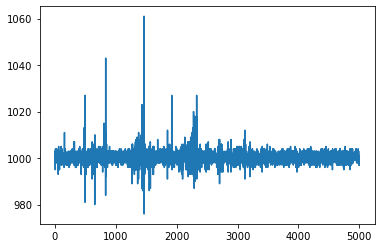

In [102]:
plt.plot(cal_plus_z.acceleration_in_z)

## 1.3 z-axis in negative direction
### Position the holder in such a way that the x-axis in MPU is shown downwards.
### Check the picture below:

In [106]:
# Always write a new one
with open('./cal_file_minus_z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

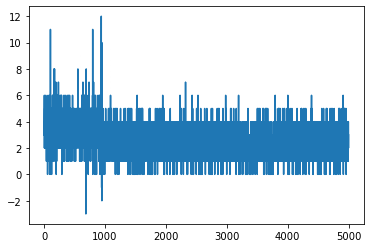

In [107]:
cal_minus_z = pd.read_csv("./cal_file_minus_z.csv")
plt.plot(cal_minus_z.acceleration_in_x)

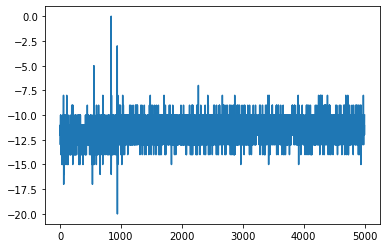

In [108]:
plt.plot(cal_minus_z.acceleration_in_y)

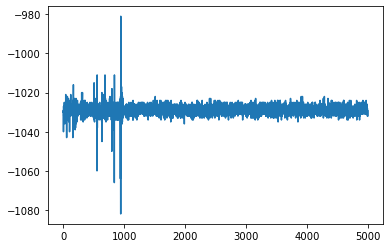

In [109]:
plt.plot(cal_minus_z.acceleration_in_z)

# other 45 degree ones
##  Z and X

In [ ]:
# Always write a new one
with open('./calibration_file_-z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

In [ ]:
calib_minus_z = pd.read_csv("./calibration_file_+z.csv")
plt.plot(calib_minus_z.acceleration_in_x)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_y)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_z)

In [ ]:
# Always write a new one
with open('./calibration_file_-z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

In [ ]:
calib_minus_z = pd.read_csv("./calibration_file_+z.csv")
plt.plot(calib_minus_z.acceleration_in_x)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_y)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_z)

In [ ]:
# Always write a new one
with open('./calibration_file_-z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

In [ ]:
calib_minus_z = pd.read_csv("./calibration_file_+z.csv")
plt.plot(calib_minus_z.acceleration_in_x)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_y)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_z)

In [ ]:
# Always write a new one
with open('./calibration_file_-z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

In [ ]:
calib_minus_z = pd.read_csv("./calibration_file_+z.csv")
plt.plot(calib_minus_z.acceleration_in_x)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_y)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_z)

In [ ]:
# Always write a new one
with open('./calibration_file_-z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

In [ ]:
calib_minus_z = pd.read_csv("./calibration_file_+z.csv")
plt.plot(calib_minus_z.acceleration_in_x)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_y)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_z)

In [ ]:
# Always write a new one
with open('./calibration_file_-z.csv', mode='w') as calibration_file:
    calibration_writer = csv.writer(calibration_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    calibration_writer.writerow(['acceleration_in_x', 'acceleration_in_y', 'acceleration_in_z'])

    calibration_list = []
    i = 0
    # Take 5000 readings
    while i < 5000:
        try:
            ser_bytes = ser.readline()
            decoded_bytes = ser_bytes[0:len(ser_bytes)-2].decode("utf-8")
            calibration_list = decoded_bytes.split(" ")
            calibration_writer.writerow(calibration_list)
            i += 1
        except:
            print("Keyboard Interrupt")
            break

In [ ]:
calib_minus_z = pd.read_csv("./calibration_file_+z.csv")
plt.plot(calib_minus_z.acceleration_in_x)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_y)

In [ ]:
plt.plot(calib_minus_z.acceleration_in_z)

### Calibrate gyroscope and Magnetometer

### How to use the data now? Calculating Pitch, Yaw and Roll